In [ ]:
# Install necessary libraries
!pip install pandas matplotlib seaborn textblob vaderSentiment


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
df=pd.read_csv('/content/twitter - twitter_training.csv.csv')

In [ ]:
def get_textblob_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

analyzer = SentimentIntensityAnalyzer()
def get_vader_sentiment(text):
    vs = analyzer.polarity_scores(text)
    return vs['compound']

In [ ]:
df.columns

Index(['no', 'place', 'sign', 'sentences'], dtype='object')

In [ ]:
# Check if 'sentences' column exists
if 'sentences' in df.columns:
    # Ensure the 'sentences' column contains only strings
    df['sentences'] = df['sentences'].astype(str)

    # Apply sentiment analysis
    df['textblob_sentiment'] = df['sentences'].apply(get_textblob_sentiment)
    df['vader_sentiment'] = df['sentences'].apply(get_vader_sentiment)
else:
    print("The 'sentences' column is not found in the DataFrame. Please check the column names.")


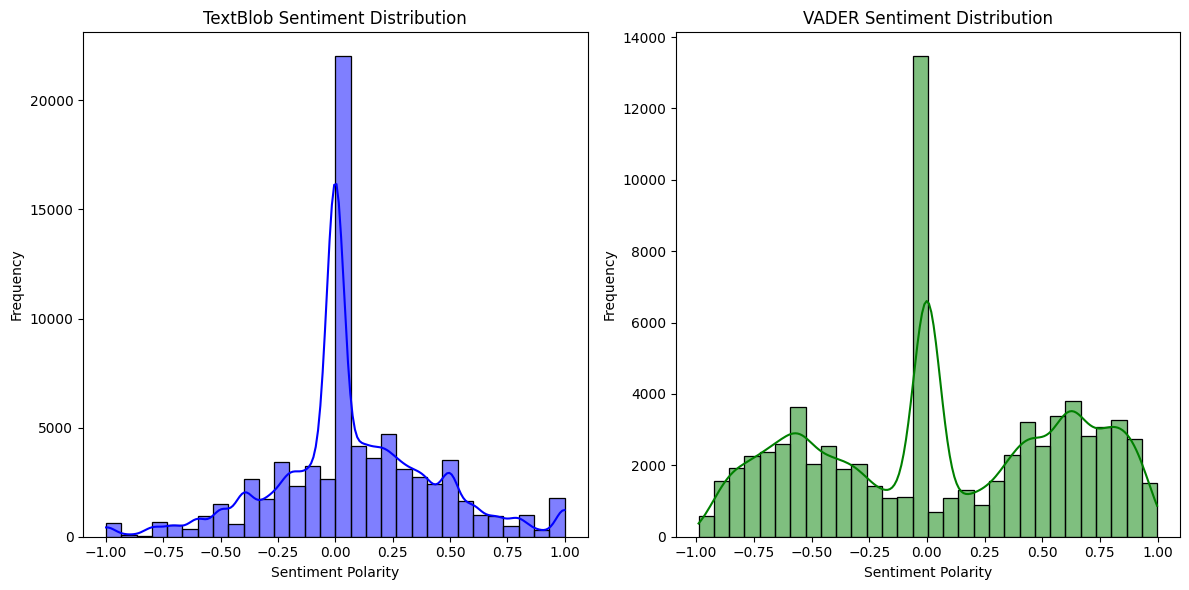

In [ ]:
# Visualize sentiment distribution
if 'textblob_sentiment' in df.columns and 'vader_sentiment' in df.columns:
    plt.figure(figsize=(12, 6))

    # TextBlob Sentiment Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df['textblob_sentiment'].dropna(), bins=30, kde=True, color='blue')
    plt.title('TextBlob Sentiment Distribution')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')

    # VADER Sentiment Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df['vader_sentiment'].dropna(), bins=30, kde=True, color='green')
    plt.title('VADER Sentiment Distribution')
    plt.xlabel('Sentiment Polarity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()
else:
    print("Sentiment columns are not found in the DataFrame. Please check the previous steps.")
